In [2]:
%matplotlib inline 
from sklearn.decomposition import PCA
from sklearn.grid_search import GridSearchCV
from sklearn.cluster import KMeans, DBSCAN 
from sklearn.mixture import GMM 
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import hamming, euclidean
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np


In [3]:
## import data for poems (starting with 5,000 features)
V = pd.read_csv('Poems/Poem_Features_Vectorize.txt',sep=',',header = None)
N2 = pd.read_csv('Poems/Poem_Features_ngram2.txt',sep=',',header = None)
N4 = pd.read_csv('Poems/Poem_Features_ngram4.txt',sep=',',header = None)
LAB = pd.read_csv('Poems/poem_feature_labels.txt',sep=',',header = None)

In [4]:
## Standardizing
def standardize(X):
    return StandardScaler().fit_transform(X)

data = [V, N2, N4]
data = [standardize(X) for X in data]
titles = ['Vect', 'N-Gram 2', 'N-Gram 4']

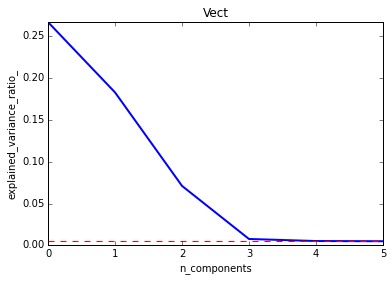


None


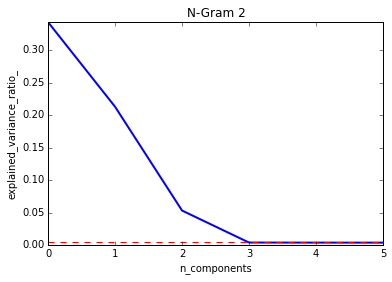


None


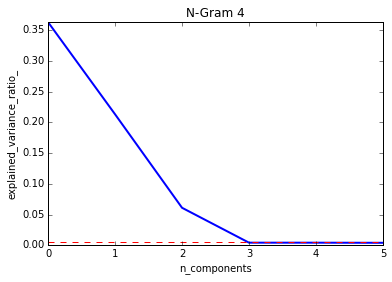


None


In [5]:
## Extract principal components , looking at variance explained of n components
# Using PCA
def getPCAPlot(X, title):
    pca = PCA()
    pca.fit(X)
    X_pca = pca.transform(X)

    # Plot the PCA spectrum
    plt.plot(pca.explained_variance_ratio_, linewidth=2)
    plt.axis('tight')
    plt.title(title)
    plt.xlabel('n_components')
    plt.ylabel('explained_variance_ratio_')
    plt.axhline(y=0.005, color="red", linestyle="--")
    plt.xlim(0,5)
    plt.show()
    print('')

# do for all data
for i in range(len(data)):
    print(getPCAPlot(data[i], titles[i]))

    
## results show that we need only 3 components  

In [6]:
## Trying n components
def getPCA(X, n=3):
    pca = PCA(n)
    pca.fit(X)
    return pca.transform(X)

### function to fit KMeans, GMM, DBSCAN
def getKM(X, k):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=10000, n_init=30)
    km.fit(X)
    klabels = km.labels_
    kcentroids = km.cluster_centers_

    ## plot K-Means
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(k):
        # plot data points
        dplt = X[np.where(klabels==i)]
        ax.plot(dplt[:,0],dplt[:,1],dplt[:,2],'o')
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    ax.set_zlabel('PCA3')
    plt.title('K-Means, k = ' + str(k))
    plt.show()
    return km

def getGMM(X, k):
    gmm = GMM(n_components=k, n_init=30, covariance_type='full')
    gmm.fit(X)
    glabels = gmm.predict(X)
    gmeans = gmm.means_
    gcovar = gmm.covars_

    ## plot GMM
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(k):
        # plot data points
        dplt = X[np.where(glabels==i)]
        plt.plot(dplt[:,0],dplt[:,1],dplt[:,2],'o')
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    ax.set_zlabel('PCA3')
    plt.title('GMM, k = ' + str(k))
    plt.show()
    return gmm

def getDBS(X):
    dbs = DBSCAN()
    dbs.fit(X)
    dlabels = dbs.labels_
    dk = dlabels.max()

    ## plot DBSCAN
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(dk):
        # plot data points
        dplt = X[np.where(dlabels==i)]
        plt.plot(dplt[:,0],dplt[:,1],dplt[:,2],'o')
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    ax.set_zlabel('PCA3')
    plt.title('DBSCAN, k = ' + str(dk))
    plt.show()
    return dbs


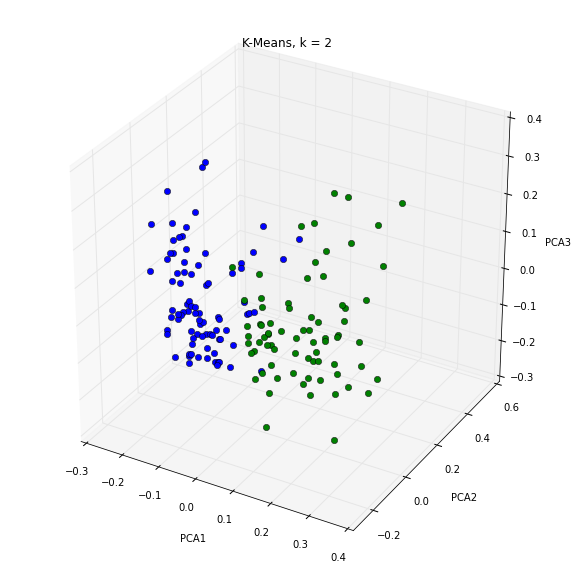

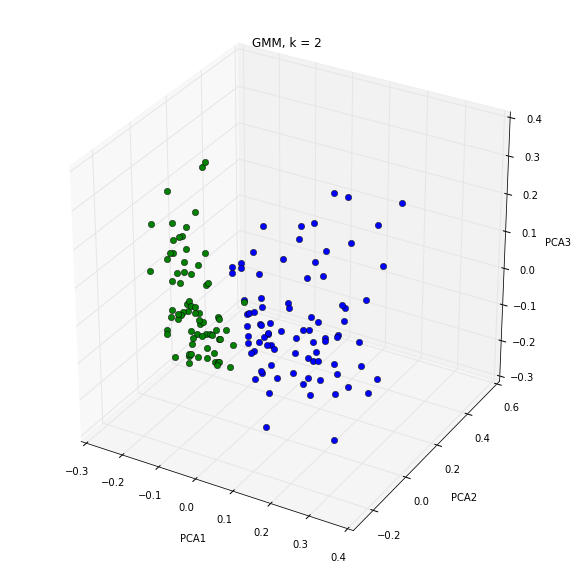

In [7]:
## clusters for TFIDF
for X1 in [V]:
    ### PCA
    X1 = getPCA(X1, n=3)
    k = 2

    ### K-Means cluster
    km1 = getKM(X1,k)

    ### GMM with covariance_type = full 
    gm1 = getGMM(X1,k)



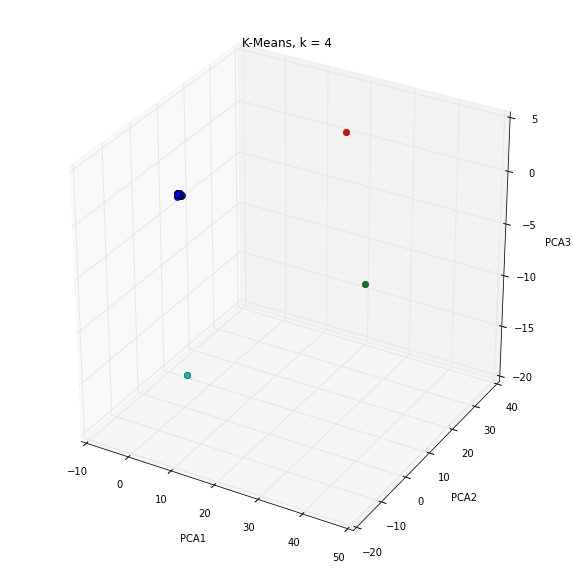

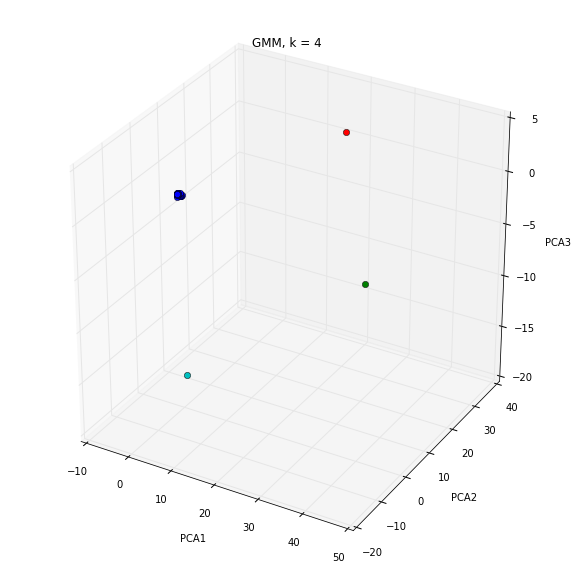

In [8]:
## clusters for 2-gram
for X2 in [N2]:
    ### PCA
    X2 = getPCA(X2, n=3)
    k = 4

    ### K-Means cluster
    km2 = getKM(X2,k)

    ### GMM with covariance_type = full 
    gm2 = getGMM(X2,k)
    


In [31]:
## list of poems that might not be Shakespeare's works using TFIDF
lgm1 = gm1.predict(X1).tolist()
ix = [i for i in range(len(lgm1)) if lgm1[i] > 0]
[LAB[0].tolist()[x] for x in ix]

['sonnet v',
 'sonnet xii',
 'sonnet xiii',
 'sonnet xv',
 'sonnet xvi',
 'sonnet xvii',
 'sonnet xxi',
 'sonnet xxv',
 'sonnet xxvii',
 'sonnet xxviii',
 'sonnet xxix',
 'sonnet xxx',
 'sonnet xxxii',
 'sonnet xxxiii',
 'sonnet xliv',
 'sonnet xlv',
 'sonnet l',
 'sonnet li',
 'sonnet lii',
 'sonnet liii',
 'sonnet liv',
 'sonnet lv',
 'sonnet lvii',
 'sonnet lviii',
 'sonnet lix',
 'sonnet lx',
 'sonnet lxiii',
 'sonnet lxiv',
 'sonnet lxv',
 'sonnet lxvi',
 'sonnet lxvii',
 'sonnet lxviii',
 'sonnet lxxi',
 'sonnet lxxii',
 'sonnet lxxv',
 'sonnet lxxvi',
 'sonnet lxxx',
 'sonnet lxxxi',
 'sonnet lxxxiii',
 'sonnet lxxxiv',
 'sonnet lxxxv',
 'sonnet lxxxvi',
 'sonnet xc',
 'sonnet xci',
 'sonnet xciv',
 'sonnet xcvii',
 'sonnet xcviii',
 'sonnet cii',
 'sonnet ciii',
 'sonnet civ',
 'sonnet cv',
 'sonnet cvi',
 'sonnet cvii',
 'sonnet cxi',
 'sonnet cxii',
 'sonnet cxv',
 'sonnet cxvi',
 'sonnet cxvii',
 'sonnet cxviii',
 'sonnet cxix',
 'sonnet cxx',
 'sonnet cxxi',
 'sonnet cxxiv'

In [32]:
## list of poems that might not be Shakespeare's works using 2-gram
lgm2 = gm2.predict(X2).tolist() 
ix = [i for i in range(len(lgm2)) if lgm2[i] > 0]
print(ix)
[LAB[0].tolist()[x] for x in ix]

[154, 155, 156]


["a lover's complaint", 'the rape of lucrece', 'venus and adonis']